In [96]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    explained_variance_score, max_error, mean_absolute_percentage_error
)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
import warnings
import time


In [97]:
# Uyarıları kapatma
warnings.filterwarnings('ignore')

# Matplotlib tarzı ayar (geçerli bir stil seç)
plt.style.use('ggplot')


In [98]:
# Veri setini yükleme
file_path = "Trafik_Verileri.csv"  # Dosya yolunu güncelle
df = pd.read_csv(file_path)

# Veri setinin ilk incelenmesi
print("Veri Seti Boyutu:", df.shape)
print("\nVeri Seti Sütunları ve Türleri:")
print(df.info())
print("\nİlk 5 Satır:")
print(df.head())

Veri Seti Boyutu: (4000, 13)

Veri Seti Sütunları ve Türleri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE_TIME           4000 non-null   object 
 1   LATITUDE            3582 non-null   float64
 2   LONGITUDE           3588 non-null   float64
 3   GEOHASH             3600 non-null   object 
 4   MINIMUM_SPEED       3598 non-null   float64
 5   MAXIMUM_SPEED       3595 non-null   float64
 6   AVERAGE_SPEED       3614 non-null   float64
 7   NUMBER_OF_VEHICLES  3614 non-null   float64
 8   WEATHER             3613 non-null   object 
 9   IS_HOLIDAY          3609 non-null   float64
 10  IS_PEAK_HOUR        3579 non-null   float64
 11  IS_WEEKEND          3600 non-null   float64
 12  SEASON              3602 non-null   object 
dtypes: float64(9), object(4)
memory usage: 406.4+ KB
None

İlk 5 Satır:
             DATE_TIME 


Eksik Değer Sayıları:
DATE_TIME               0
LATITUDE              418
LONGITUDE             412
GEOHASH               400
MINIMUM_SPEED         402
MAXIMUM_SPEED         405
AVERAGE_SPEED         386
NUMBER_OF_VEHICLES    386
WEATHER               387
IS_HOLIDAY            391
IS_PEAK_HOUR          421
IS_WEEKEND            400
SEASON                398
dtype: int64


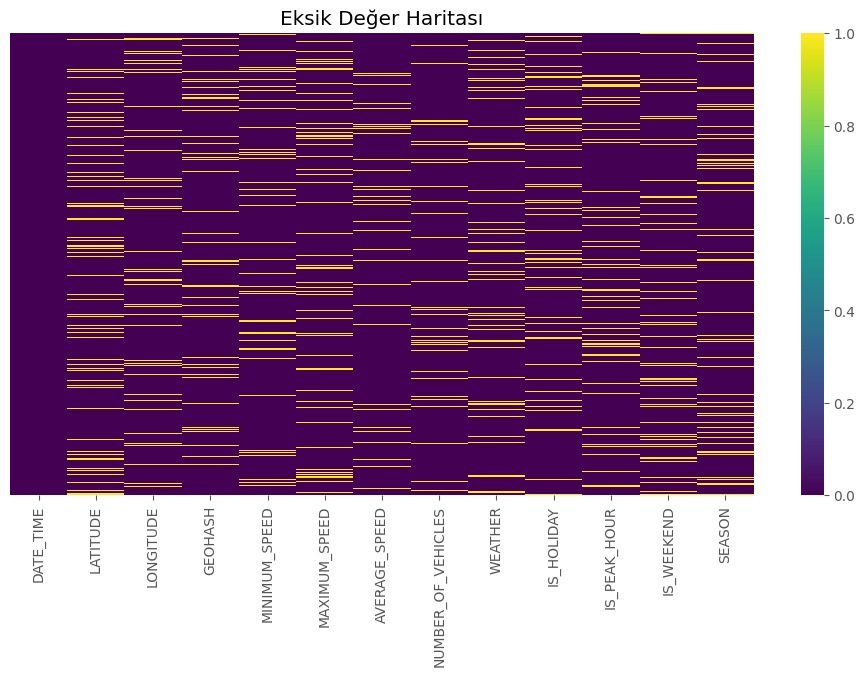

Veri Seti Boyutu: (4000, 13)

Veri Seti Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE_TIME           4000 non-null   object 
 1   LATITUDE            3582 non-null   float64
 2   LONGITUDE           3588 non-null   float64
 3   GEOHASH             3600 non-null   object 
 4   MINIMUM_SPEED       3598 non-null   float64
 5   MAXIMUM_SPEED       3595 non-null   float64
 6   AVERAGE_SPEED       3614 non-null   float64
 7   NUMBER_OF_VEHICLES  3614 non-null   float64
 8   WEATHER             3613 non-null   object 
 9   IS_HOLIDAY          3609 non-null   float64
 10  IS_PEAK_HOUR        3579 non-null   float64
 11  IS_WEEKEND          3600 non-null   float64
 12  SEASON              3602 non-null   object 
dtypes: float64(9), object(4)
memory usage: 406.4+ KB
None

Veri Seti Temel İstatistiksel Özellikleri:
      

In [99]:
# Eksik değerlerin analizi
print("\nEksik Değer Sayıları:")
print(df.isnull().sum())

# Eksik değer haritası
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title("Eksik Değer Haritası")
plt.show()

# Veri seti boyutunun kontrolü
print("Veri Seti Boyutu:", df.shape)

# Veri türleri ve sütun bilgisi
print("\nVeri Seti Bilgisi:")
print(df.info())

# Temel istatistiksel bilgiler
print("\nVeri Seti Temel İstatistiksel Özellikleri:")
print(df.describe())

# Eksik değerlerin sayısı
print("\nEksik Değer Sayıları:")
print(df.isnull().sum())

# Kategorik sütunların kontrolü
# İlk olarak tüm sütun adlarını listeleyelim
print("\nVeri Setindeki Sütunlar:")
print(df.columns)

# Kategorik sütunlar belirleniyor
categorical_columns = ['WEATHER', 'IS_HOLIDAY', 'IS_PEAK_HOUR', 'IS_WEEKEND', 'SEASON']

# Kategorik değişkenlerde unique değerlerin kontrolü
print("\nKategorik Değişkenlerin Unique Değerleri:")
for col in categorical_columns:
    if col in df.columns:  # Sütun isimleri uyuşuyorsa kontrol et
        print(f"\n{col} sütununun unique değerleri:")
        print(df[col].value_counts())
    else:
        print(f"\n{col} sütunu veri setinde bulunamadı.")

# Sütun isimlerini kontrol edelim
print("Orijinal Sütun İsimleri:")
print(df.columns)

# Sütun isimlerini temizleyelim
df.columns = df.columns.str.strip()  # Boşlukları temizle
df.columns = df.columns.str.replace(' ', '_').str.upper()  # Boşlukları alt tire ile değiştir ve büyük harfe çevir

# Temizlendikten sonra sütun isimleri
print("\nTemizlenmiş Sütun İsimleri:")
print(df.columns)

# Tekrar kontrol ederek eksik değer durumuna bakalım
print("\nEksik Değerler Temizlendikten Sonra:")
print(df.isnull().sum())


Eksik Değerler Doldurulduktan Sonra:
DATE_TIME             0
LATITUDE              0
LONGITUDE             0
GEOHASH               0
MINIMUM_SPEED         0
MAXIMUM_SPEED         0
AVERAGE_SPEED         0
NUMBER_OF_VEHICLES    0
WEATHER               0
IS_HOLIDAY            0
IS_PEAK_HOUR          0
IS_WEEKEND            0
SEASON                0
dtype: int64


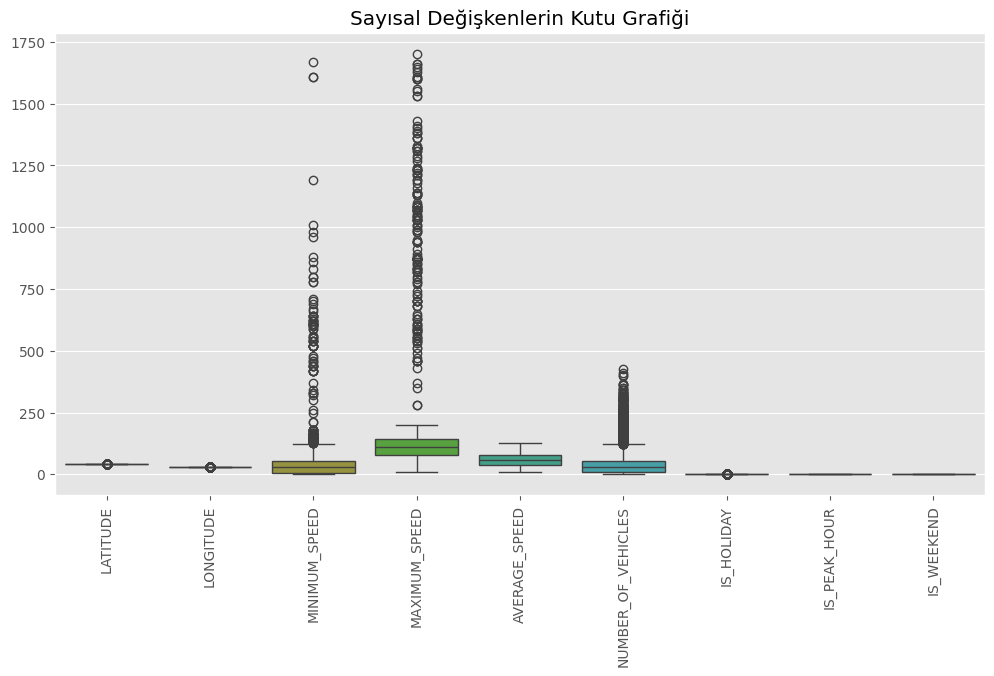

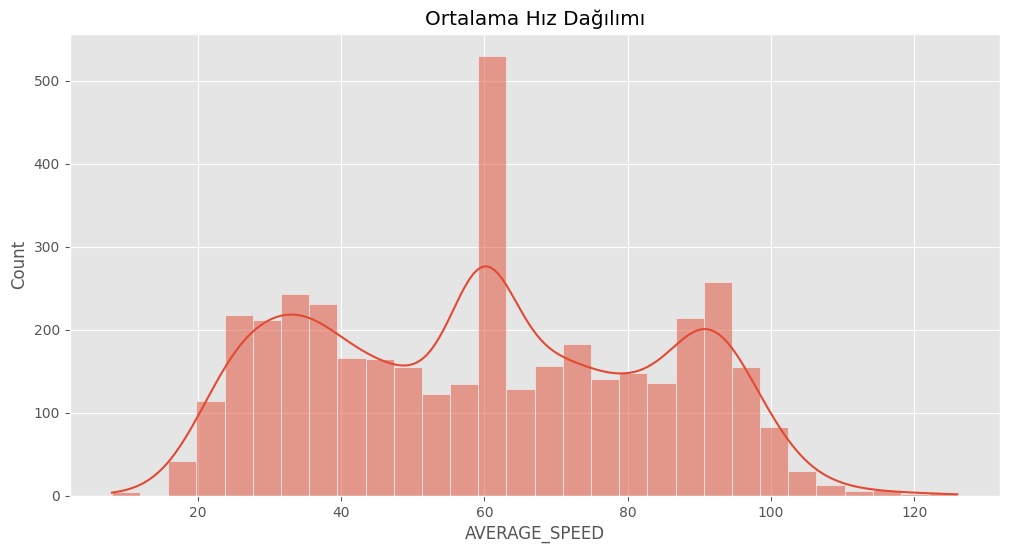

In [100]:
# Eksik değer analizi ve doldurma
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Sayısal sütunları ortalama ile doldurma
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Kategorik sütunları mod (en sık değer) ile doldurma
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Eksik değerlerin tekrar kontrol edilmesi
print("\nEksik Değerler Doldurulduktan Sonra:")
print(df.isnull().sum())

# Veri keşfi ve görselleştirme
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns])
plt.title("Sayısal Değişkenlerin Kutu Grafiği")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['AVERAGE_SPEED'], bins=30, kde=True)
plt.title("Ortalama Hız Dağılımı")
plt.show()

In [101]:
# Sayısal sütunları ortalama ile doldurma
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Kategorik sütunları mod (en sık değer) ile doldurma
categorical_columns = ['WEATHER', 'SEASON']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# Eksik değerlerin tekrar kontrol edilmesi
print("\nEksik Değerler Doldurulduktan Sonra:")
print(df.isnull().sum())

# DATE_TIME sütununu datetime formatına çevirme
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], errors='coerce')


Eksik Değerler Doldurulduktan Sonra:
DATE_TIME             0
LATITUDE              0
LONGITUDE             0
GEOHASH               0
MINIMUM_SPEED         0
MAXIMUM_SPEED         0
AVERAGE_SPEED         0
NUMBER_OF_VEHICLES    0
WEATHER               0
IS_HOLIDAY            0
IS_PEAK_HOUR          0
IS_WEEKEND            0
SEASON                0
dtype: int64


In [102]:
# Yeni zaman bazlı özellikler oluşturma
df['HOUR'] = df['DATE_TIME'].dt.hour
df['DAY'] = df['DATE_TIME'].dt.day
df['MONTH'] = df['DATE_TIME'].dt.month
df['YEAR'] = df['DATE_TIME'].dt.year
df['WEEKDAY'] = df['DATE_TIME'].dt.weekday
df['IS_WEEKEND'] = df['WEEKDAY'].apply(lambda x: 1 if x >= 5 else 0)

# Zaman bazlı özelliklerin ilk birkaç satırını görüntüleme
print("\nZaman Bazlı Özellikler:")
print(df[['DATE_TIME', 'HOUR', 'DAY', 'MONTH', 'YEAR', 'WEEKDAY', 'IS_WEEKEND']].head())



Zaman Bazlı Özellikler:
            DATE_TIME  HOUR  DAY  MONTH  YEAR  WEEKDAY  IS_WEEKEND
0 2024-09-01 02:00:00     2    1      9  2024        6           1
1 2024-12-01 01:00:00     1    1     12  2024        6           1
2 2024-09-01 01:00:00     1    1      9  2024        6           1
3 2024-08-01 02:00:00     2    1      8  2024        3           0
4 2024-12-01 00:00:00     0    1     12  2024        6           1


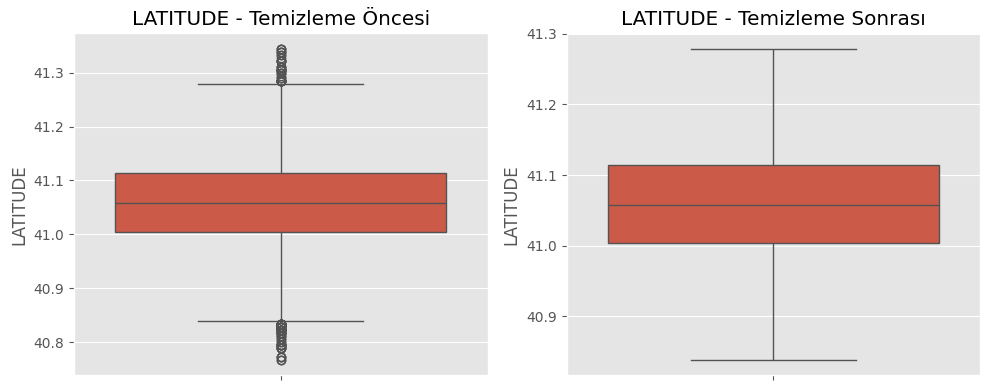

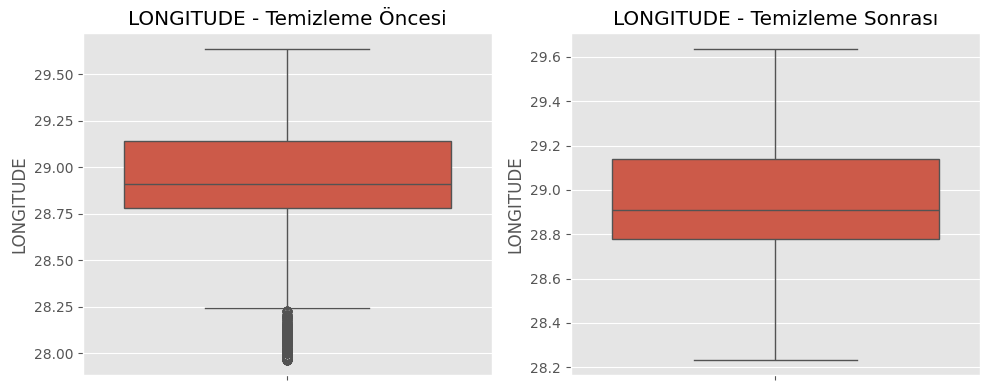

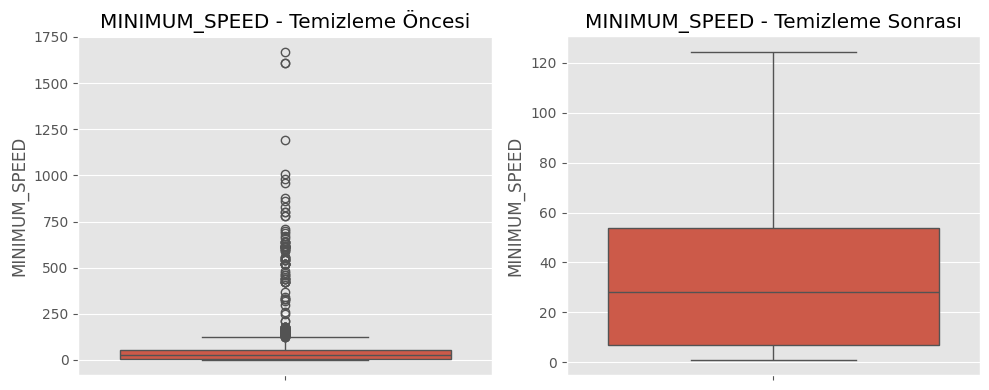

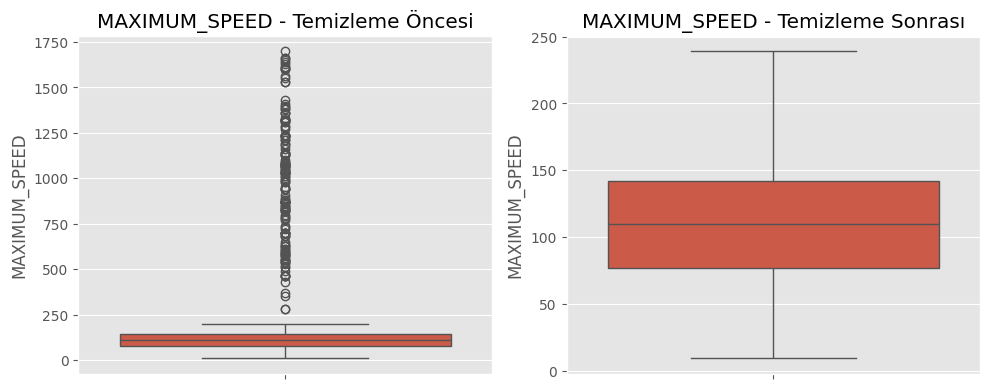

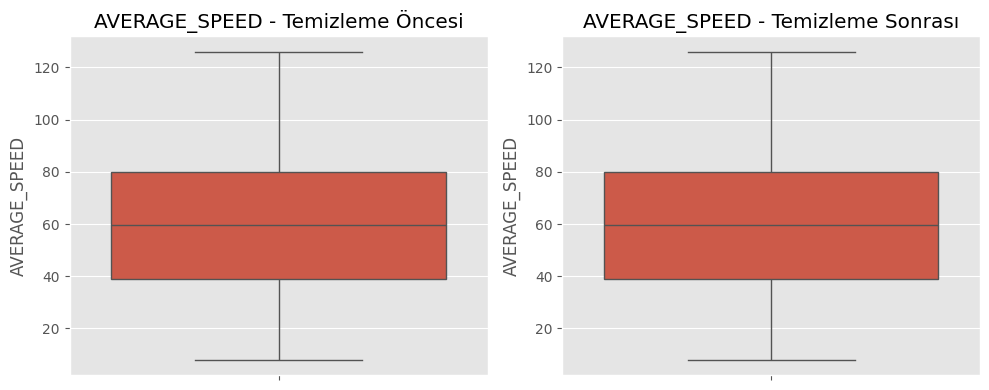

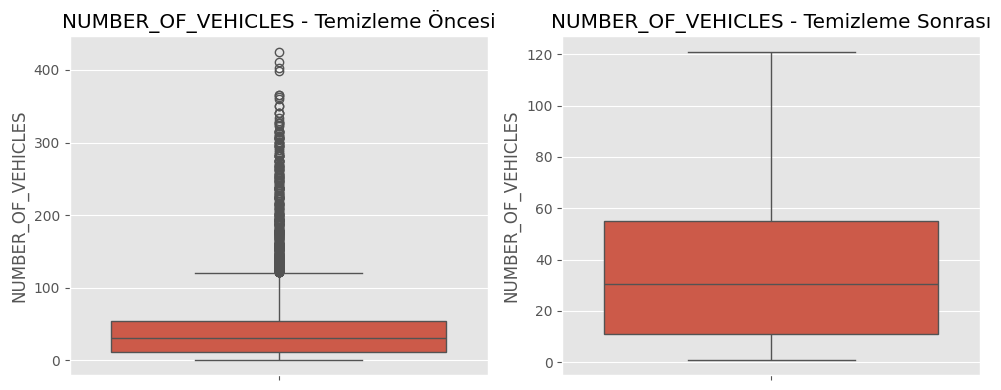

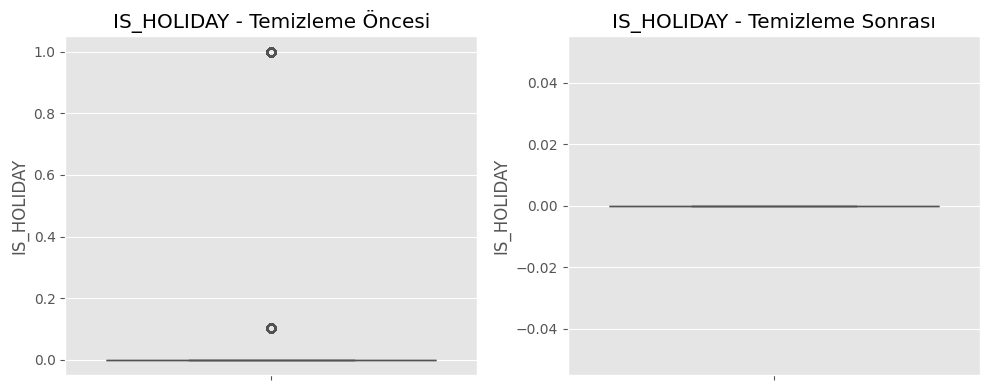

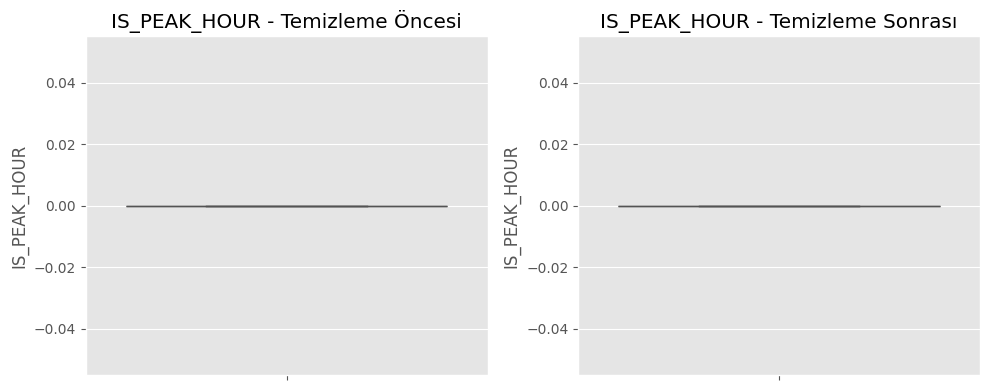

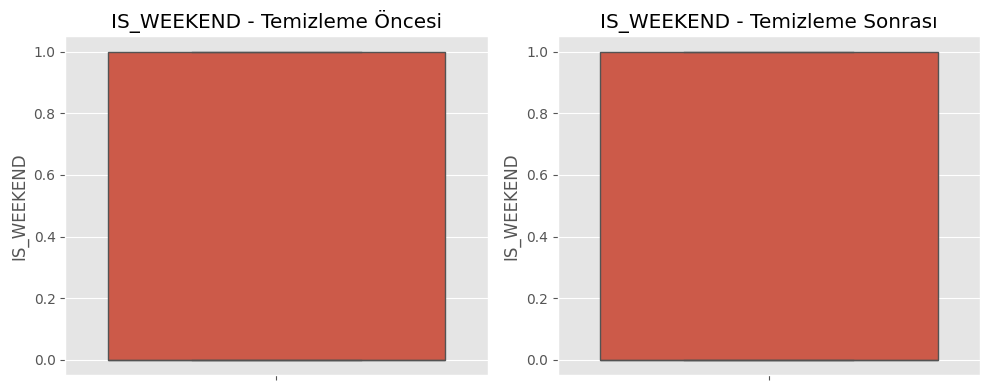

Aykırı değerler başarıyla düzeltildi.


In [103]:
# Aykırı değerlerin tespiti ve düzeltilmesi (IQR yöntemi)
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerleri sınırlarla değiştirme
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

# Sayısal sütunlarda aykırı değerleri kontrol edip düzeltme
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(df[col])
    plt.title(f'{col} - Temizleme Öncesi')

    df = handle_outliers(df, col)

    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    plt.title(f'{col} - Temizleme Sonrası')
    plt.tight_layout()
    plt.show()

print("Aykırı değerler başarıyla düzeltildi.")

In [104]:
# StandardScaler uygulama
scaler = StandardScaler()
scaled_columns = ['LATITUDE', 'LONGITUDE', 'MINIMUM_SPEED', 'MAXIMUM_SPEED', 'AVERAGE_SPEED', 'NUMBER_OF_VEHICLES']
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

print("\nVeri Normalizasyonu Tamamlandı. İlk birkaç satıra bakalım:")
print(df[scaled_columns].head())

# Özellikler (X) ve hedef değişken (y)
X = df.drop(columns=['AVERAGE_SPEED', 'DATE_TIME', 'GEOHASH'])  # Hedef değişken hariç
y = df['AVERAGE_SPEED']  # Hedef değişken

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nEğitim ve Test Setleri:")
print(f"X_train boyutu: {X_train.shape}")
print(f"X_test boyutu: {X_test.shape}")
print(f"y_train boyutu: {y_train.shape}")
print(f"y_test boyutu: {y_test.shape}")

# Kategorik değişkenleri belirleme
categorical_columns = ['WEATHER', 'SEASON']

# One-Hot Encoding uygulama (daha iyi model performansı için)
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Tekrar X ve y'yi oluşturma
X = df.drop(columns=['AVERAGE_SPEED', 'DATE_TIME', 'GEOHASH'])
y = df['AVERAGE_SPEED']

# Eğitim ve test setlerine yeniden ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nKategorik veriler encode edildi ve veri yeniden hazırlandı.")
print(f"Yeni X_train boyutu: {X_train.shape}")
print(f"Yeni X_test boyutu: {X_test.shape}")



Veri Normalizasyonu Tamamlandı. İlk birkaç satıra bakalım:
   LATITUDE  LONGITUDE  MINIMUM_SPEED  MAXIMUM_SPEED  AVERAGE_SPEED  \
0 -0.280625  -1.530587      -0.039344      -0.112670       0.219472   
1 -2.295721   1.325034      -0.591761      -0.497936      -0.368188   
2 -1.777553   1.110862      -0.683831      -0.951191      -0.745969   
3 -0.798793  -0.388339      -0.653141      -0.724563      -0.116333   
4 -0.280625  -0.035187      -0.929350      -0.316635       0.000000   

   NUMBER_OF_VEHICLES  
0           -0.827225  
1           -0.244272  
2           -0.032289  
3           -0.853723  
4            2.087541  

Eğitim ve Test Setleri:
X_train boyutu: (3200, 15)
X_test boyutu: (800, 15)
y_train boyutu: (3200,)
y_test boyutu: (800,)

Kategorik veriler encode edildi ve veri yeniden hazırlandı.
Yeni X_train boyutu: (3200, 16)
Yeni X_test boyutu: (800, 16)


In [105]:
from sklearn.model_selection import RandomizedSearchCV

# Model parametreleri
rf_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

svr_params = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5, 0.3]
}

# Modelleri tanımlama
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomizedSearchCV(RandomForestRegressor(random_state=42), rf_params, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1),
    'Gradient Boosting': RandomizedSearchCV(GradientBoostingRegressor(random_state=42), gb_params, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1),
    'SVR': RandomizedSearchCV(SVR(), svr_params, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42)
}

# Model sonuçlarını saklamak için dictionary
results = {}



Model: Linear Regression
R2 Score: 0.4822
MAE: 0.5285
RMSE: 0.7038
Explained Variance: 0.4882
MAPE: 55117757996220.3750
Cross Val Score: 0.4540


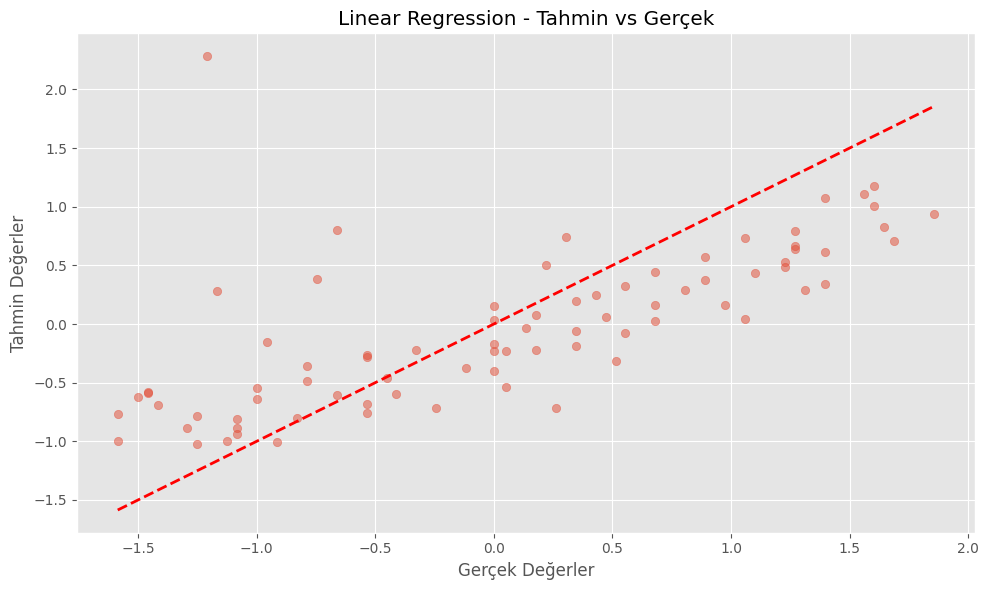


Model: Random Forest
Fitting 3 folds for each of 10 candidates, totalling 30 fits
En iyi parametreler: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}
En iyi cross-validation skoru: 0.7420982384457847
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
R2 Score: 0.8050
MAE: 0.3280
RMSE: 0.4319
Explained Variance: 0.8052
MAPE: 167060830353032.2188
Cross Val Score: 0.7337


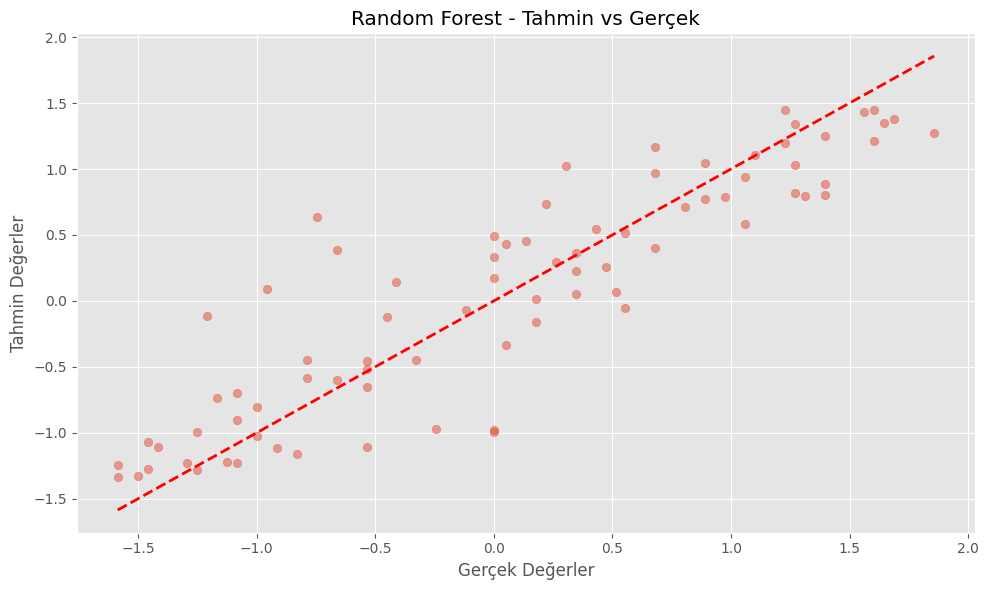


Model: Gradient Boosting
Fitting 3 folds for each of 8 candidates, totalling 24 fits
En iyi parametreler: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
En iyi cross-validation skoru: 0.7545114026614237
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits
R2 Score: 0.7664
MAE: 0.3541
RMSE: 0.4727
Explained Variance: 0.7666
MAPE: 214624638902285.6875
Cross Val Score: 0.7521


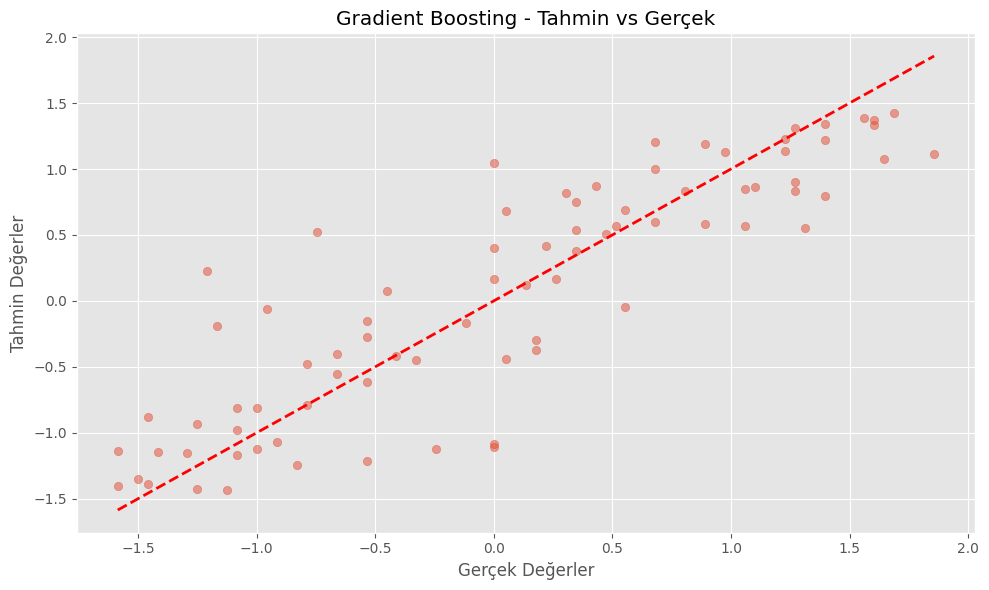


Model: SVR
Fitting 3 folds for each of 8 candidates, totalling 24 fits
En iyi parametreler: {'kernel': 'linear', 'epsilon': 0.2, 'C': 0.1}
En iyi cross-validation skoru: 0.3748133485915514
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits
R2 Score: 0.4263
MAE: 0.4479
RMSE: 0.7408
Explained Variance: 0.4263
MAPE: 79593916879657.1250
Cross Val Score: 0.3748


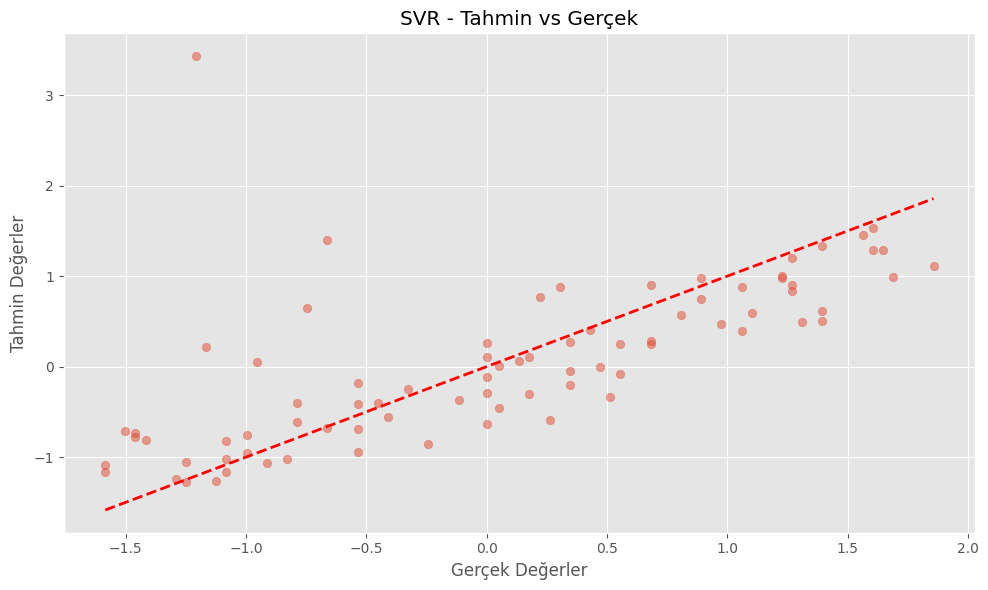


Model: Ridge
R2 Score: 0.4815
MAE: 0.5293
RMSE: 0.7042
Explained Variance: 0.4876
MAPE: 55132789717475.3359
Cross Val Score: 0.4558


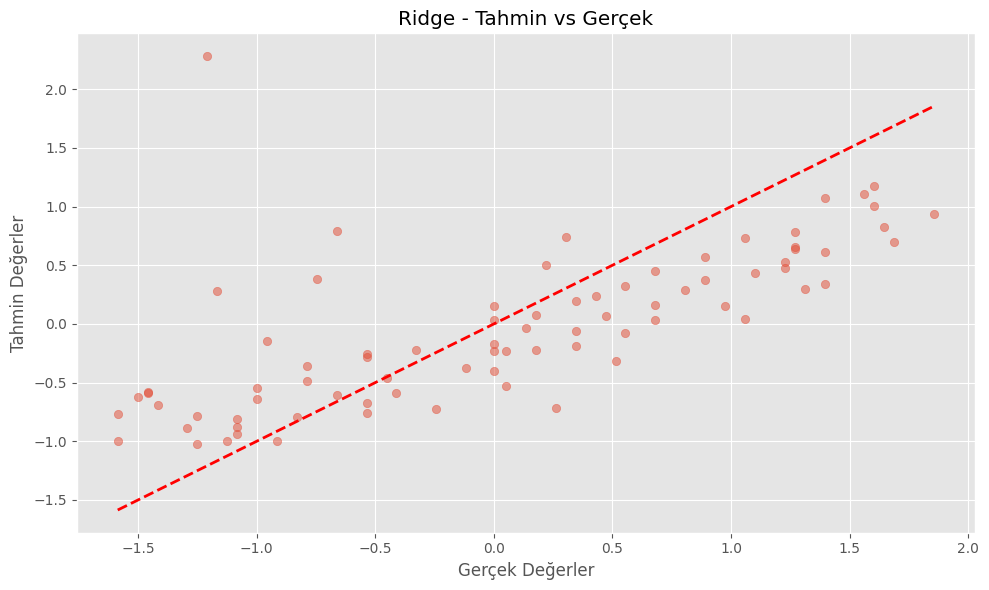


Model: Lasso
R2 Score: -0.0001
MAE: 0.8372
RMSE: 0.9781
Explained Variance: 0.0000
MAPE: 11409845096221.3867
Cross Val Score: -0.0102


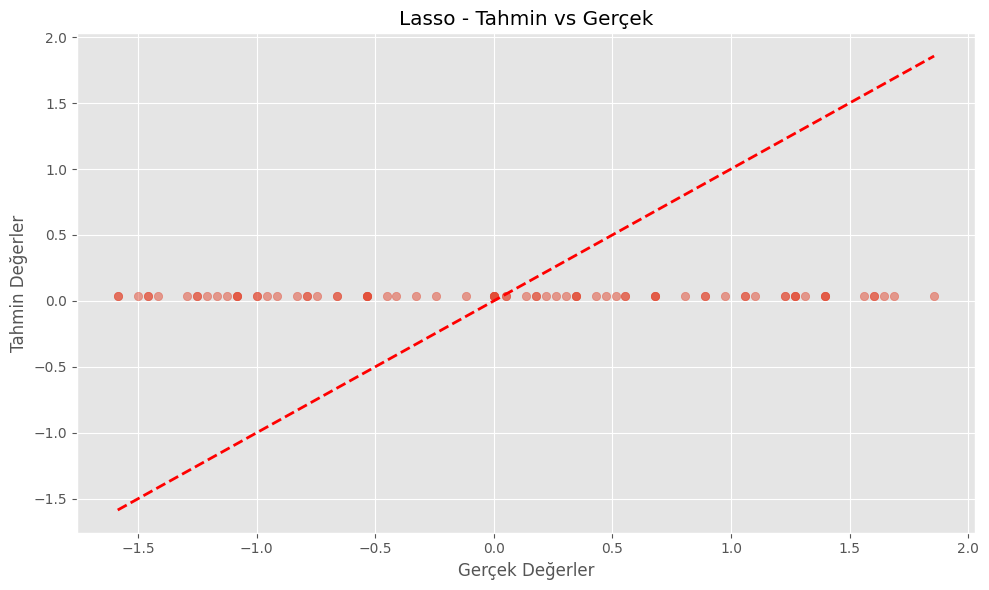


Model Karşılaştırma
--------------------------------------------------

Tüm Model Metrikleri:
                   R2 Score       MAE      RMSE  Explained Variance  \
Linear Regression  0.482228  0.528491  0.703750            0.488248   
Random Forest      0.805011  0.328021  0.431871            0.805212   
Gradient Boosting  0.766375  0.354069  0.472725            0.766596   
SVR                0.426342  0.447912  0.740757            0.426348   
Ridge              0.481543  0.529273  0.704215            0.487576   
Lasso             -0.000073  0.837241  0.978058            0.000000   

                           MAPE  Cross Val Score  
Linear Regression  5.511776e+13         0.454022  
Random Forest      1.670608e+14         0.733686  
Gradient Boosting  2.146246e+14         0.752055  
SVR                7.959392e+13         0.374813  
Ridge              5.513279e+13         0.455814  
Lasso              1.140985e+13        -0.010162  


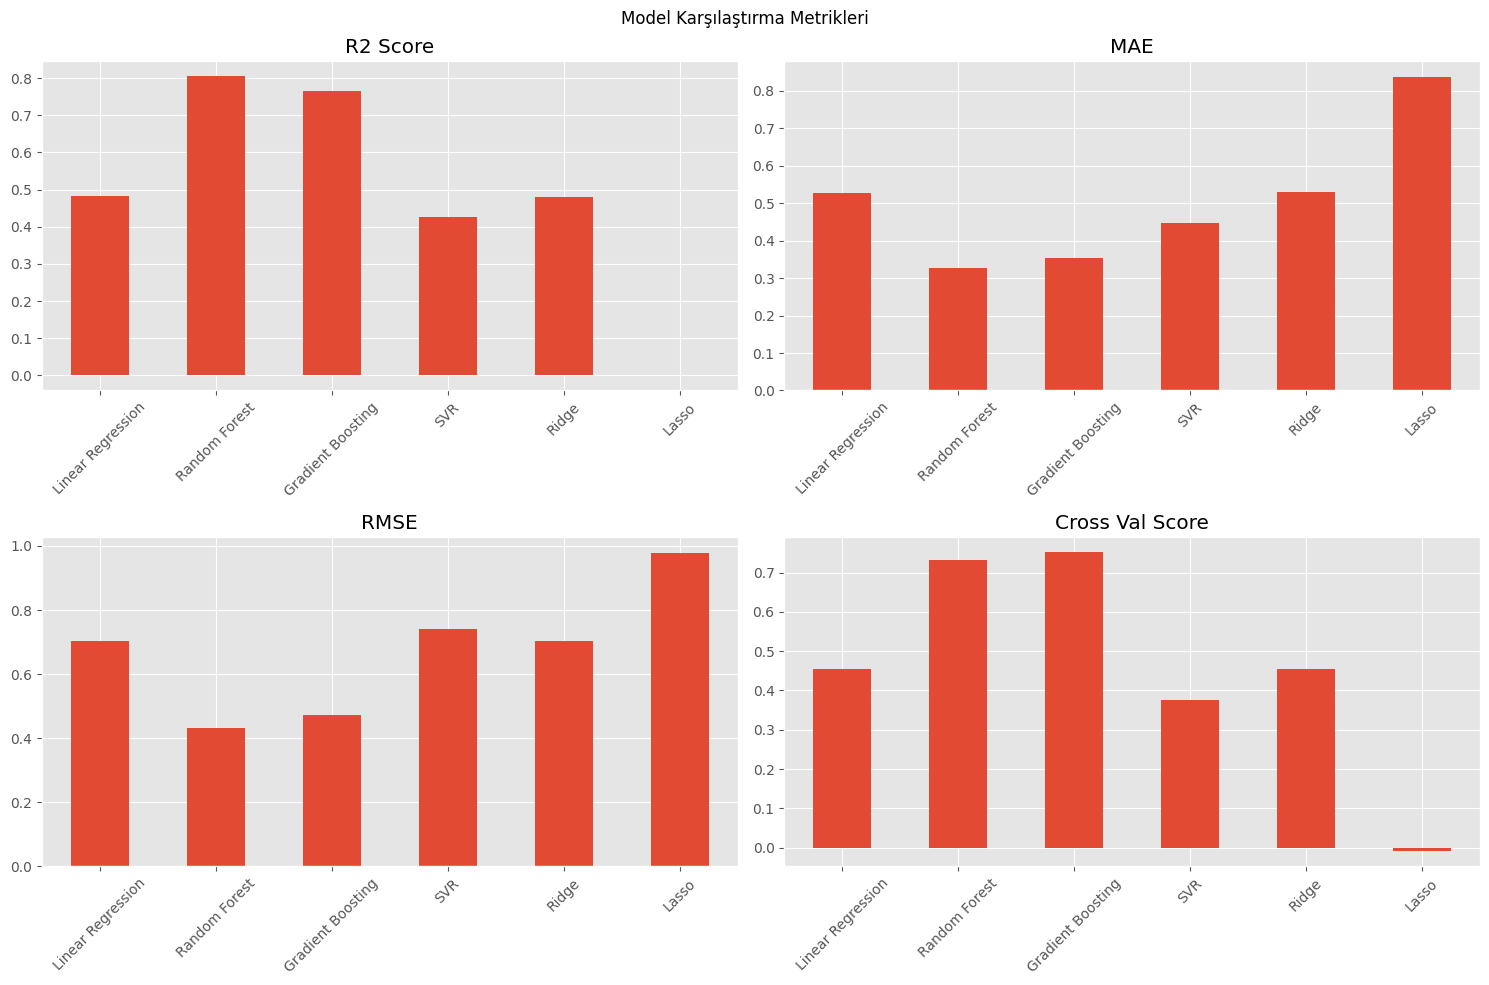

In [106]:
from sklearn.model_selection import RandomizedSearchCV

# Model parametreleri
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

gb_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

svr_params = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1],
    'epsilon': [0.1, 0.2]
}

# Küçük bir veri örneği oluşturma
sample_size = 0.1
df_sample = df.sample(frac=sample_size, random_state=42)
X_sample = df_sample.drop(columns=['AVERAGE_SPEED', 'DATE_TIME', 'GEOHASH'])
y_sample = df_sample['AVERAGE_SPEED']

# Eğitim ve test setlerine ayırma
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Modelleri tanımlama
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomizedSearchCV(RandomForestRegressor(random_state=42), rf_params, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1),
    'Gradient Boosting': RandomizedSearchCV(GradientBoostingRegressor(random_state=42), gb_params, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1),
    'SVR': RandomizedSearchCV(SVR(), svr_params, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42)
}

# Model sonuçlarını saklamak için dictionary
results = {}

# Her model için eğitim ve değerlendirme
for name, model in models.items():
    print(f"\nModel: {name}")

    # Model eğitimi
    model.fit(X_train_sample, y_train_sample)

    # RandomizedSearchCV kullanılan modeller için en iyi parametreleri yazdırma
    if isinstance(model, RandomizedSearchCV):
        print("En iyi parametreler:", model.best_params_)
        print("En iyi cross-validation skoru:", model.best_score_)

    # Tahminler
    y_pred = model.predict(X_test_sample)

    # Metrikler
    metrics = {
        'R2 Score': r2_score(y_test_sample, y_pred),
        'MAE': mean_absolute_error(y_test_sample, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test_sample, y_pred)),
        'Explained Variance': explained_variance_score(y_test_sample, y_pred),
        'MAPE': mean_absolute_percentage_error(y_test_sample, y_pred),
        'Cross Val Score': np.mean(cross_val_score(model, X_train_sample, y_train_sample, cv=3))
    }

    # Sonuçları yazdırma
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

    results[name] = metrics

    # Tahmin vs Gerçek değer grafiği
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_sample, y_pred, alpha=0.5)
    plt.plot([y_test_sample.min(), y_test_sample.max()], [y_test_sample.min(), y_test_sample.max()], 'r--', lw=2)
    plt.xlabel('Gerçek Değerler')
    plt.ylabel('Tahmin Değerler')
    plt.title(f'{name} - Tahmin vs Gerçek')
    plt.tight_layout()
    plt.show()

# Model karşılaştırma
print("\nModel Karşılaştırma")
print("-" * 50)

# Sonuçları DataFrame'e çevirme
results_df = pd.DataFrame(results).T
print("\nTüm Model Metrikleri:")
print(results_df)

# Metrikleri görselleştirme
metrics_to_plot = ['R2 Score', 'MAE', 'RMSE', 'Cross Val Score']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Karşılaştırma Metrikleri')

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i//2, i%2]
    results_df[metric].plot(kind='bar', ax=ax)
    ax.set_title(metric)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()



Özellik Önem Analizi
--------------------------------------------------


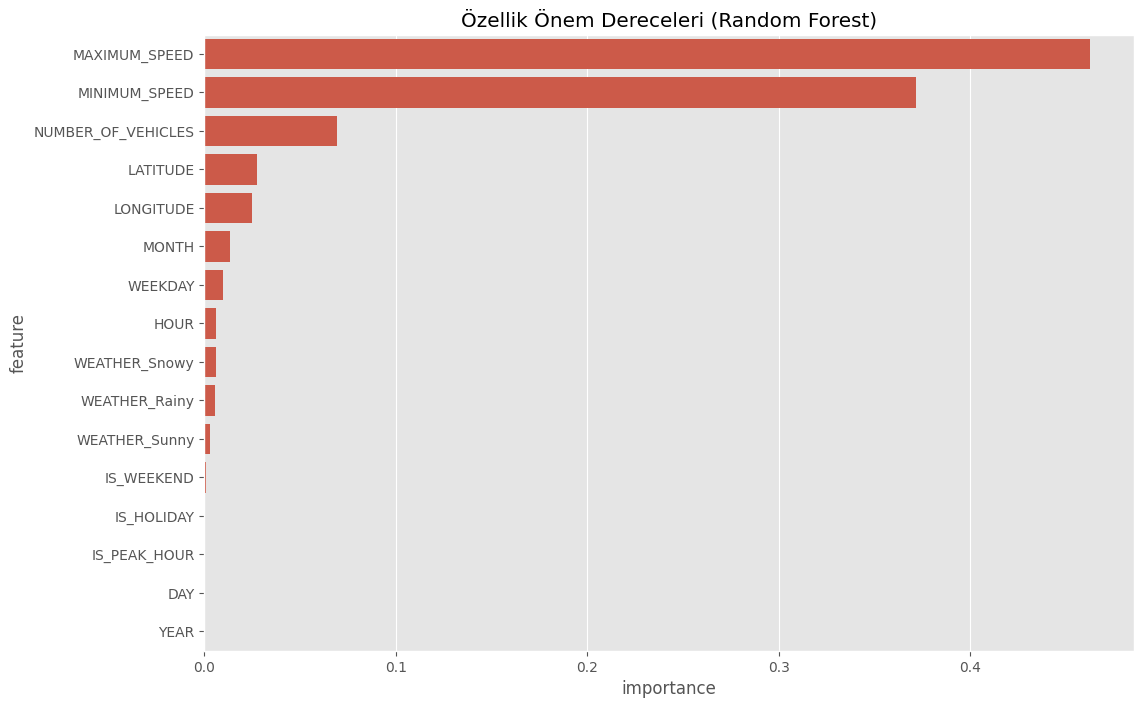


SVR Modeli İçin Özellik Önem Analizi
--------------------------------------------------

En önemli 10 özellik (SVR):
               feature  importance
2        MINIMUM_SPEED    0.384120
3        MAXIMUM_SPEED    0.344835
0             LATITUDE    0.015869
1            LONGITUDE    0.008727
4   NUMBER_OF_VEHICLES    0.005600
8                 HOUR    0.003174
12             WEEKDAY    0.003130
15       WEATHER_Sunny    0.002670
10               MONTH    0.000963
14       WEATHER_Snowy    0.000343


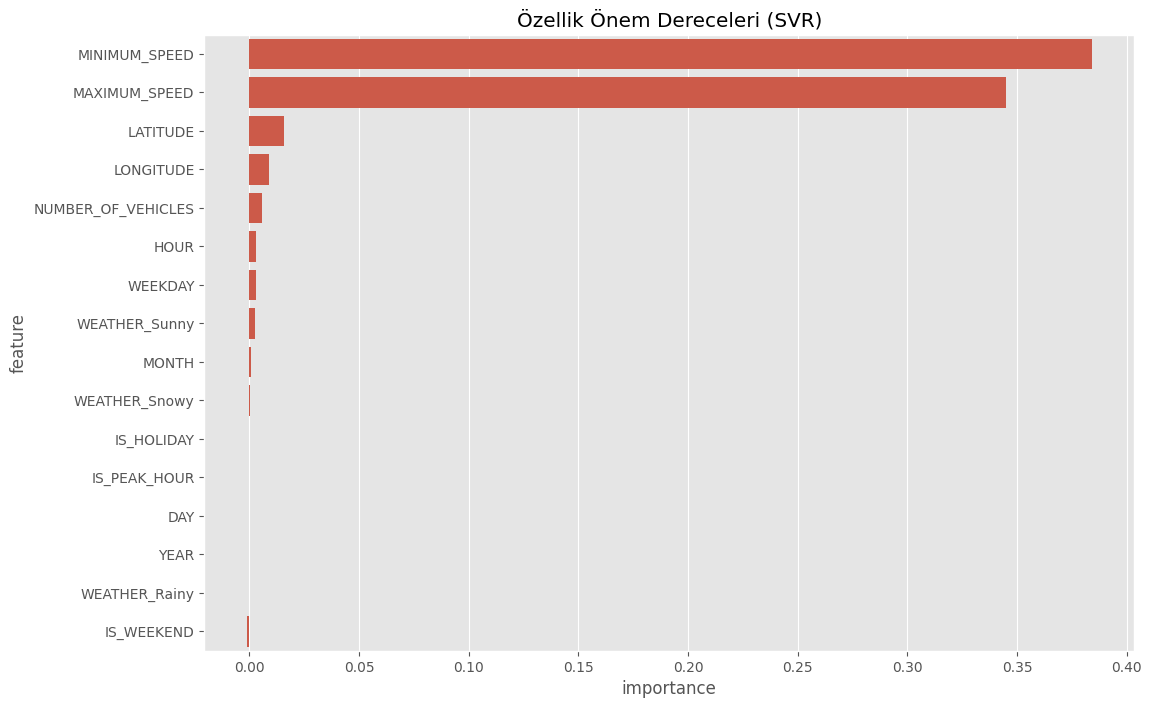


Gradient Boosting Modeli İçin Özellik Önem Analizi
--------------------------------------------------

En önemli 10 özellik (Gradient Boosting):
               feature  importance
3        MAXIMUM_SPEED    0.589625
2        MINIMUM_SPEED    0.354072
1            LONGITUDE    0.054086
0             LATITUDE    0.049768
4   NUMBER_OF_VEHICLES    0.042554
8                 HOUR    0.002047
15       WEATHER_Sunny    0.000279
12             WEEKDAY    0.000222
10               MONTH    0.000214
14       WEATHER_Snowy    0.000071


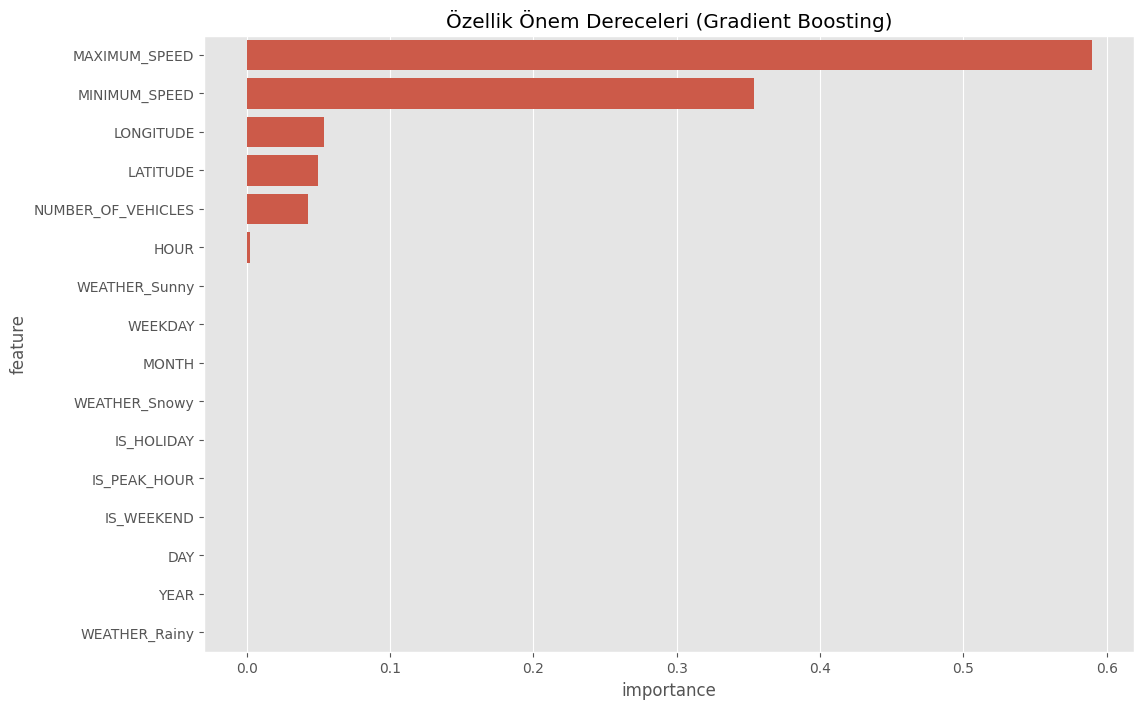

In [107]:
from sklearn.inspection import permutation_importance

# Özellik Önem Analizi
print("\nÖzellik Önem Analizi")
print("-" * 50)

# Random Forest modeli için özellik önemleri
features = X.columns  # Özellik isimlerinin alınması
rf_model = models['Random Forest'].best_estimator_ if isinstance(models['Random Forest'], RandomizedSearchCV) else models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Özellik Önem Dereceleri (Random Forest)')
plt.show()

# SVR modeli için özellik önem analizi
print("\nSVR Modeli İçin Özellik Önem Analizi")
print("-" * 50)

svr_model = models['SVR'].best_estimator_ if isinstance(models['SVR'], RandomizedSearchCV) else models['SVR']
svr_model.fit(X_train, y_train)

# Permutation feature importance
result = permutation_importance(svr_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

svr_importance = pd.DataFrame({
    'feature': features,
    'importance': result.importances_mean
}).sort_values('importance', ascending=False)

print("\nEn önemli 10 özellik (SVR):")
print(svr_importance.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=svr_importance)
plt.title('Özellik Önem Dereceleri (SVR)')
plt.show()

# Gradient Boosting modeli için özellik önem analizi
print("\nGradient Boosting Modeli İçin Özellik Önem Analizi")
print("-" * 50)

gb_model = models['Gradient Boosting'].best_estimator_ if isinstance(models['Gradient Boosting'], RandomizedSearchCV) else models['Gradient Boosting']
gb_model.fit(X_train, y_train)

# Permutation feature importance
result = permutation_importance(gb_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

gb_importance = pd.DataFrame({
    'feature': features,
    'importance': result.importances_mean
}).sort_values('importance', ascending=False)

print("\nEn önemli 10 özellik (Gradient Boosting):")
print(gb_importance.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=gb_importance)
plt.title('Özellik Önem Dereceleri (Gradient Boosting)')
plt.show()



Learning Curves Analizi
--------------------------------------------------


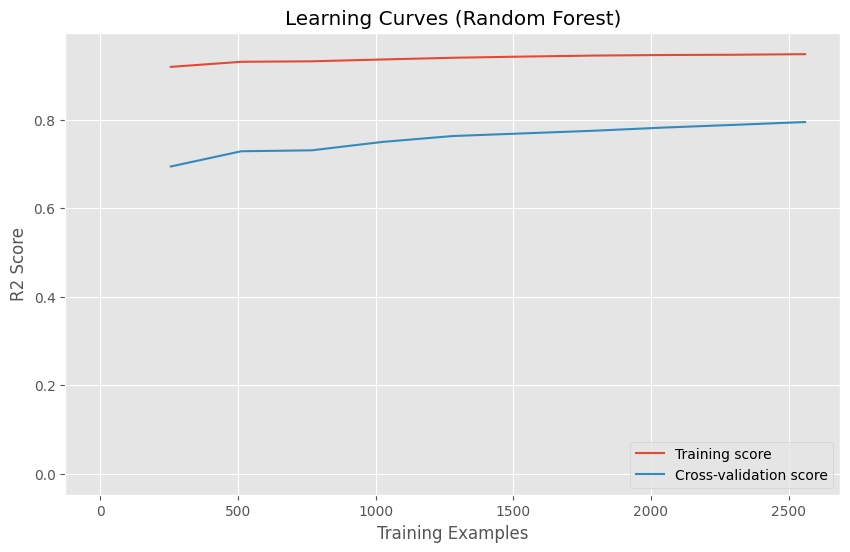

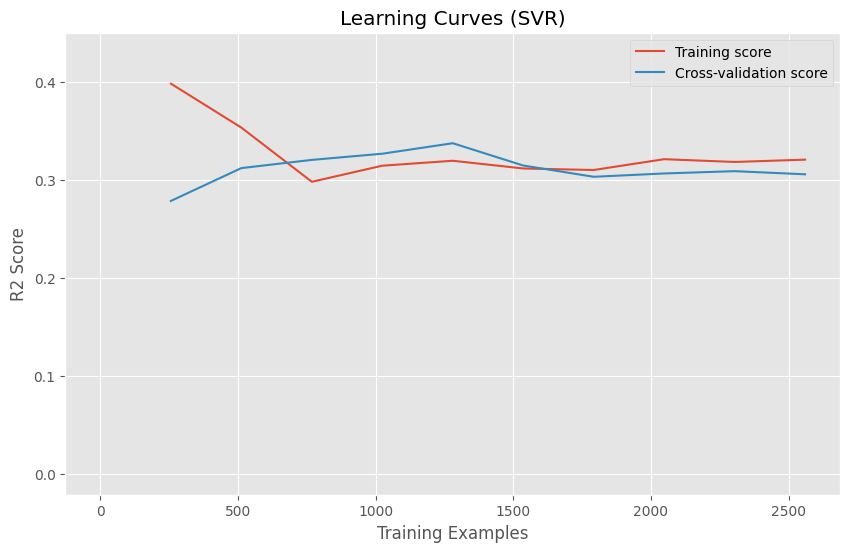

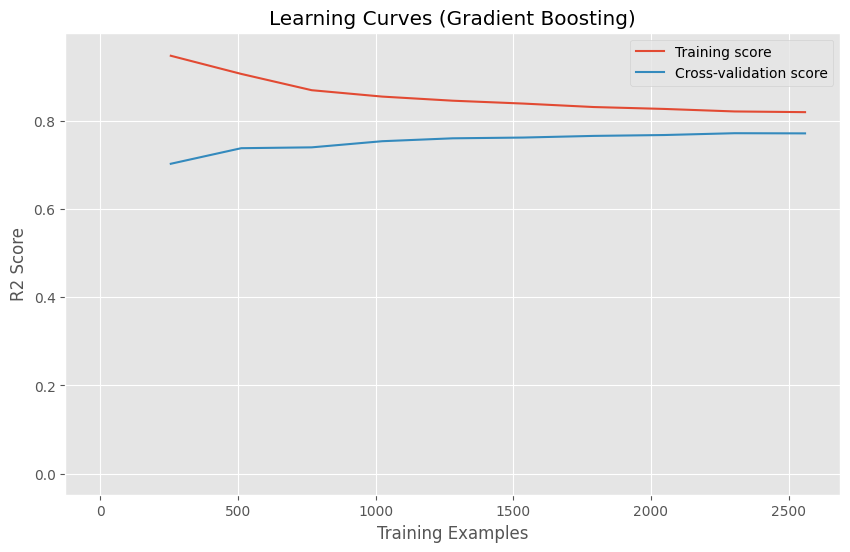


Model Karşılaştırma
--------------------------------------------------

Tüm Model Metrikleri:
                   R2 Score       MAE      RMSE  Explained Variance  \
Linear Regression  0.482228  0.528491  0.703750            0.488248   
Random Forest      0.805011  0.328021  0.431871            0.805212   
Gradient Boosting  0.766375  0.354069  0.472725            0.766596   
SVR                0.426342  0.447912  0.740757            0.426348   
Ridge              0.481543  0.529273  0.704215            0.487576   
Lasso             -0.000073  0.837241  0.978058            0.000000   

                           MAPE  Cross Val Score  
Linear Regression  5.511776e+13         0.454022  
Random Forest      1.670608e+14         0.733686  
Gradient Boosting  2.146246e+14         0.752055  
SVR                7.959392e+13         0.374813  
Ridge              5.513279e+13         0.455814  
Lasso              1.140985e+13        -0.010162  


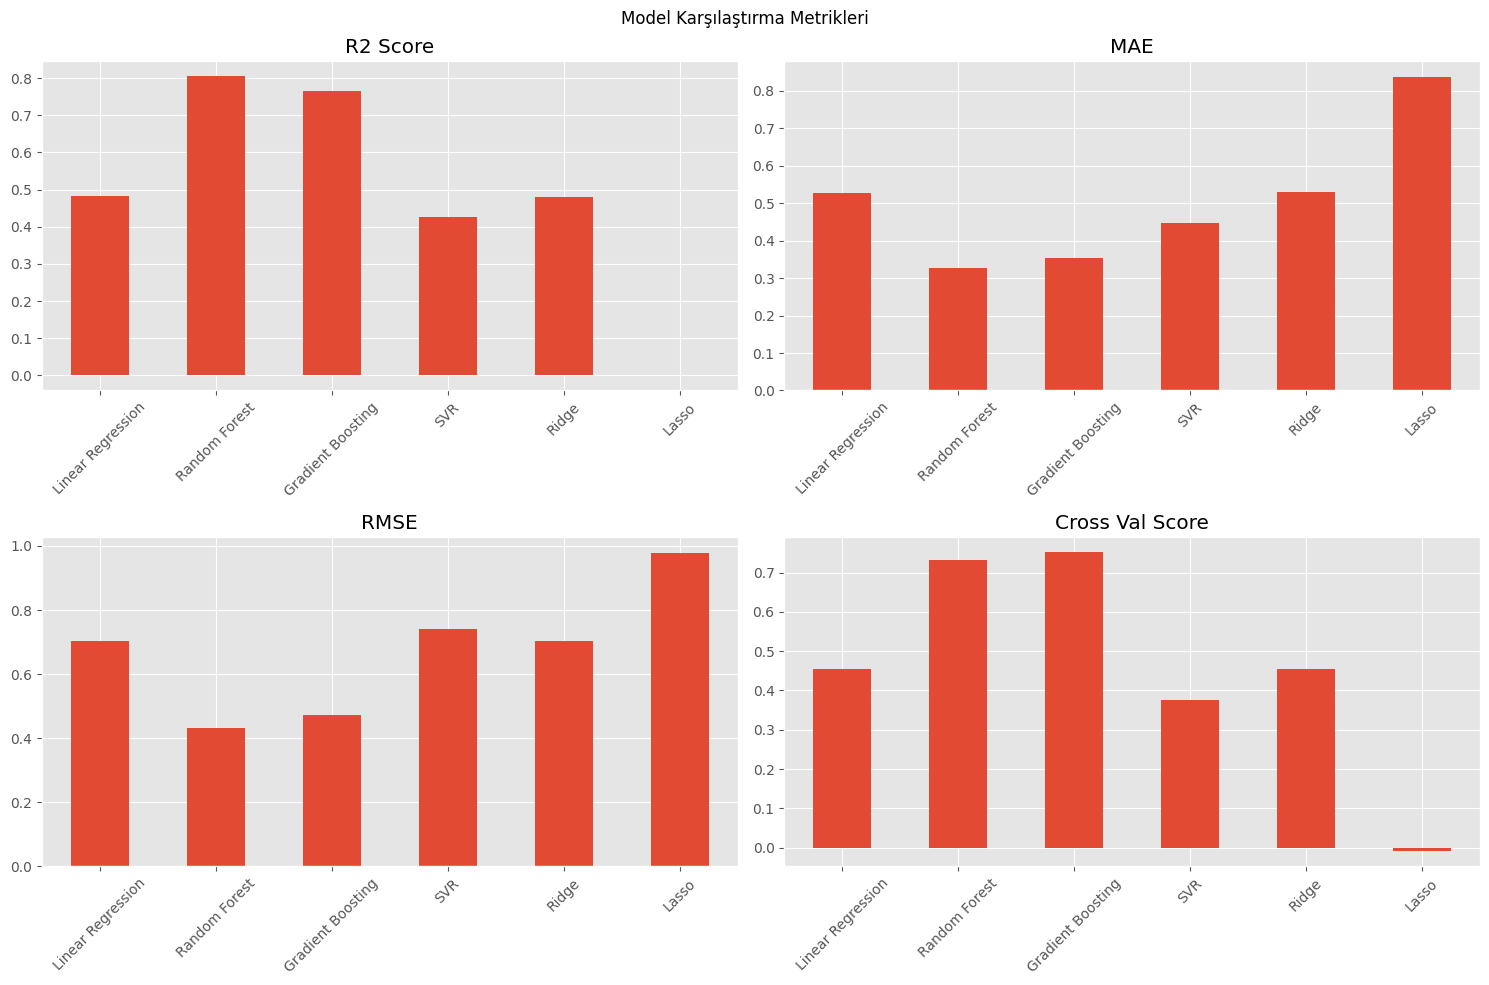

In [108]:

# Learning curves analizi
print("\nLearning Curves Analizi")
print("-" * 50)

def plot_learning_curves(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='r2'
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')

    plt.fill_between(train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(test_mean - test_std, test_mean + test_std, alpha=0.1)

    plt.xlabel('Training Examples')
    plt.ylabel('R2 Score')
    plt.title(f'Learning Curves ({model_name})')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Seçili modeller için learning curves
for name in ['Random Forest', 'SVR', 'Gradient Boosting']:
    model = models[name].best_estimator_ if isinstance(models[name], RandomizedSearchCV) else models[name]
    plot_learning_curves(model, X_train, y_train, name)

# Model karşılaştırma
print("\nModel Karşılaştırma")
print("-" * 50)

# Sonuçları DataFrame'e çevirme
results_df = pd.DataFrame(results).T
print("\nTüm Model Metrikleri:")
print(results_df)

# Metrikleri görselleştirme
metrics_to_plot = ['R2 Score', 'MAE', 'RMSE', 'Cross Val Score']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Karşılaştırma Metrikleri')

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i//2, i%2]
    results_df[metric].plot(kind='bar', ax=ax)
    ax.set_title(metric)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()



Model Tahmin Süreleri Analizi
--------------------------------------------------


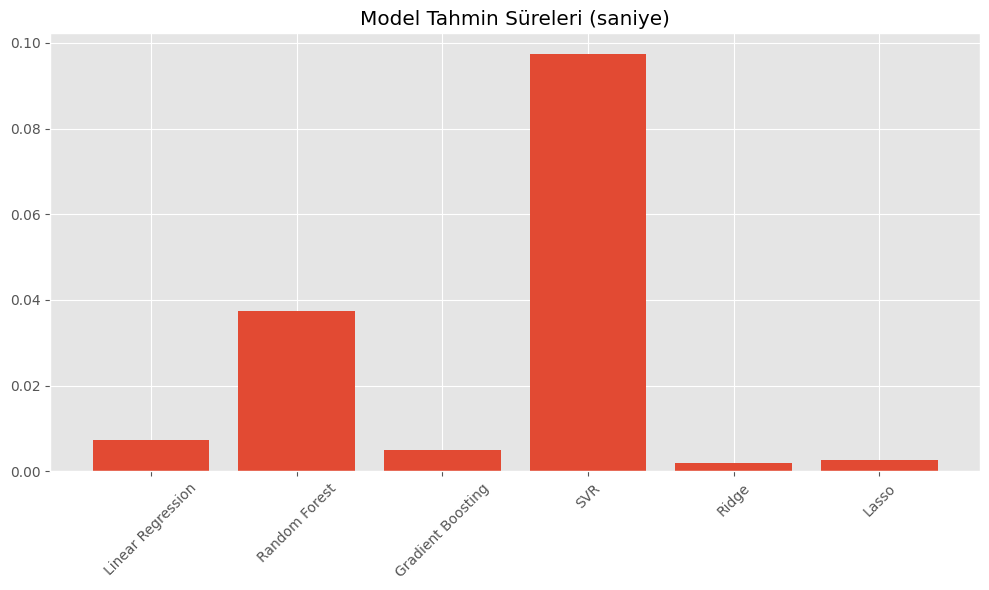

In [109]:

# Model tahmin süreleri analizi
print("\nModel Tahmin Süreleri Analizi")
print("-" * 50)

prediction_times = {}

for name, model in models.items():
    start_time = time.time()
    model.predict(X_test)
    end_time = time.time()
    prediction_times[name] = end_time - start_time

# Tahmin sürelerini görselleştirme
plt.figure(figsize=(10, 6))
plt.bar(prediction_times.keys(), prediction_times.values())
plt.xticks(rotation=45)
plt.title('Model Tahmin Süreleri (saniye)')
plt.tight_layout()
plt.show()




In [110]:
# Sonuçları kaydetme
print("\nSonuçları Kaydetme")
print("-" * 50)

# Model performans sonuçlarını kaydetme
results_df.to_csv('model_performance_results.csv')
print("Model performans sonuçları kaydedildi.")

# Özellik önem derecelerini kaydetme
feature_importance.to_csv('feature_importance_rf.csv')
svr_importance.to_csv('feature_importance_svr.csv')
gb_importance.to_csv('feature_importance_gb.csv')
print("Özellik önem dereceleri kaydedildi.")

# En iyi modeli kaydetme
import joblib
best_model_name = results_df['R2 Score'].idxmax()
best_model_object = models[best_model_name]
joblib.dump(best_model_object, 'best_model.joblib')
print("En iyi model kaydedildi.")


Sonuçları Kaydetme
--------------------------------------------------
Model performans sonuçları kaydedildi.
Özellik önem dereceleri kaydedildi.
En iyi model kaydedildi.


In [111]:
# Özet Rapor
print("\nÖzet Rapor")
print("-" * 50)
print("Analiz Sonuçları:")
print(f"1. En iyi model: {best_model_name}")
print(f"2. En iyi R2 skoru: {results_df.loc[best_model_name, 'R2 Score']:.4f}")

print("\nEn etkili faktörler:")
for idx, row in feature_importance.head(5).iterrows():
    print(f"- {row['feature']}: {row['importance']:.4f}")

# Model Karşılaştırması
print("\nModel Karşılaştırması:")
for model_name in results_df.index:
    print(f"\n{model_name}:")
    print(f"R2 Score: {results_df.loc[model_name, 'R2 Score']:.4f}")
    print(f"RMSE: {results_df.loc[model_name, 'RMSE']:.4f}")
    print(f"MAE: {results_df.loc[model_name, 'MAE']:.4f}")
    print(f"Explained Variance: {results_df.loc[model_name, 'Explained Variance']:.4f}")
    print(f"MAPE: {results_df.loc[model_name, 'MAPE']:.4f}")
    print(f"Cross Validation Score: {results_df.loc[model_name, 'Cross Val Score']:.4f}")



Özet Rapor
--------------------------------------------------
Analiz Sonuçları:
1. En iyi model: Random Forest
2. En iyi R2 skoru: 0.8050

En etkili faktörler:
- MAXIMUM_SPEED: 0.4625
- MINIMUM_SPEED: 0.3714
- NUMBER_OF_VEHICLES: 0.0692
- LATITUDE: 0.0273
- LONGITUDE: 0.0248

Model Karşılaştırması:

Linear Regression:
R2 Score: 0.4822
RMSE: 0.7038
MAE: 0.5285
Explained Variance: 0.4882
MAPE: 55117757996220.3750
Cross Validation Score: 0.4540

Random Forest:
R2 Score: 0.8050
RMSE: 0.4319
MAE: 0.3280
Explained Variance: 0.8052
MAPE: 167060830353032.2188
Cross Validation Score: 0.7337

Gradient Boosting:
R2 Score: 0.7664
RMSE: 0.4727
MAE: 0.3541
Explained Variance: 0.7666
MAPE: 214624638902285.6875
Cross Validation Score: 0.7521

SVR:
R2 Score: 0.4263
RMSE: 0.7408
MAE: 0.4479
Explained Variance: 0.4263
MAPE: 79593916879657.1250
Cross Validation Score: 0.3748

Ridge:
R2 Score: 0.4815
RMSE: 0.7042
MAE: 0.5293
Explained Variance: 0.4876
MAPE: 55132789717475.3359
Cross Validation Score: 0.45